In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
#load the dataset
data = pd.read_csv(r'C:\Users\GICHEHA\Documents\Flatiron\dsc-data-science-env-config\stats\Regression_Project\Data\kc_house_data.csv')

In [3]:
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [4]:
#dropping columns/features 
columns_to_drop = ['date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
data.drop(columns=columns_to_drop, inplace=True)


In [5]:
data.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'condition', 'grade', 'yr_built'],
      dtype='object')

In [6]:
print("The median value in the waterfront feature is", data['waterfront'].median())
print("The mode value in the waterfront feature is", data['waterfront'].mode())
print("The mean value in the waterfront feature is", data['waterfront'].mean())

The median value in the waterfront feature is 0.0
The mode value in the waterfront feature is 0    0.0
dtype: float64
The mean value in the waterfront feature is 0.007595858696217679


In [7]:
data.isna().sum()

id                0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64

In [8]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,3.409825,7.657915,1970.999676
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.650546,1.173200,29.375234
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1951.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,1997.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,2015.000000


In [9]:
#impute the missing values with the mode
mode_value = data['waterfront'].mode()[0]
data['waterfront'].fillna(mode_value, inplace= True)

data.isna().sum() 

id             0
price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
condition      0
grade          0
yr_built       0
dtype: int64

Data Preparation
			§ Feature inspection (use e.g. scatter matrix, histograms, pairplot, heatmap)
			§ Select Relevant Columns (comment on why each feature is selected and cross-validate them with e.g., scatter matrix, pairplot, heatmap etc ) 
			§ Clean relevant columns further if necessary 
			§ Check for regression assumptions

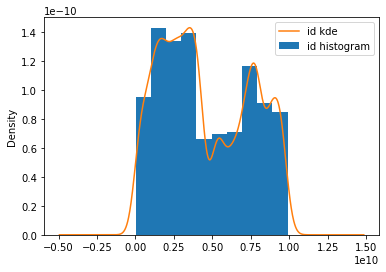

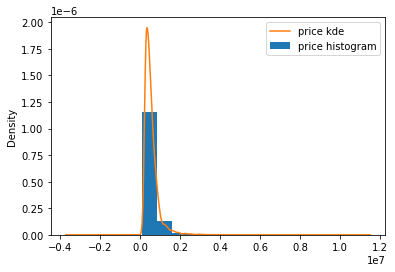

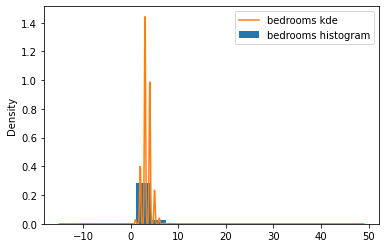

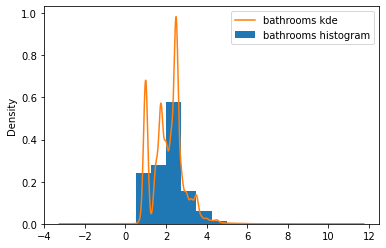

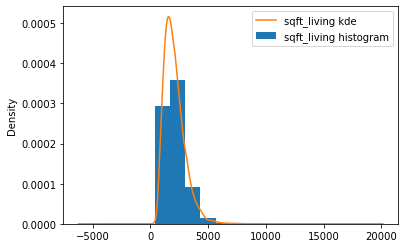

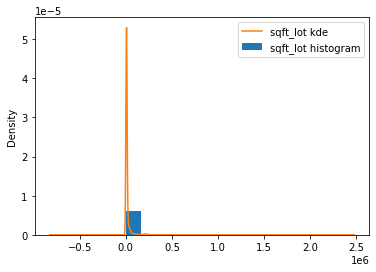

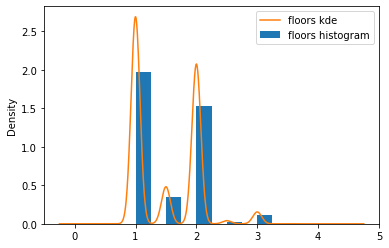

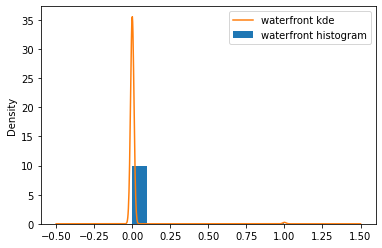

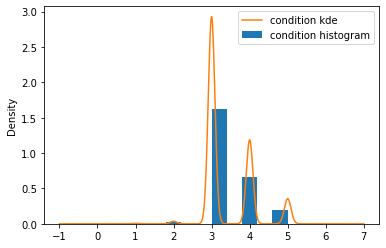

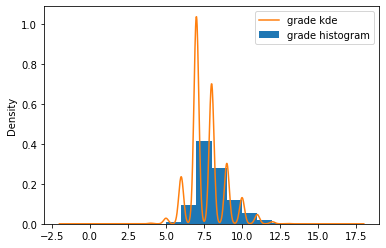

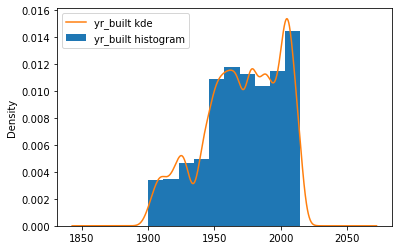

In [10]:
#feature inspection

for column in data:
    data[column].plot.hist(density=True, label = column+' histogram')
    data[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

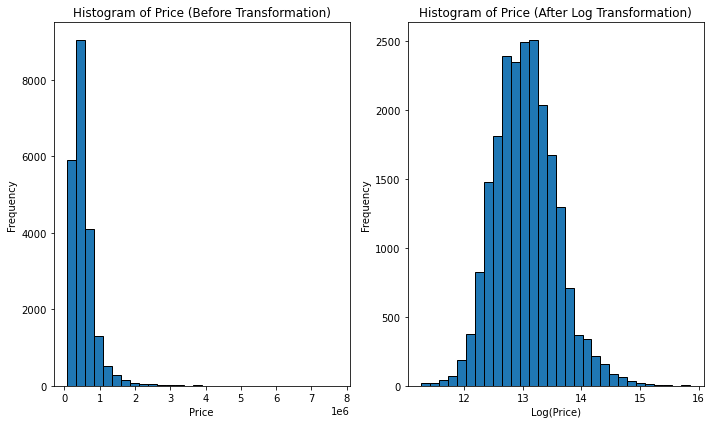

In [11]:
#Plot histograms or boxplots of the target variable (price) to visually identify outliers.
# Check distribution of 'price' before transformation
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(data['price'], bins=30, edgecolor='black')
plt.title('Histogram of Price (Before Transformation)')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Log transform 'price'
data['price_log'] = np.log1p(data['price'])

# Check distribution of 'price_log' after transformation
plt.subplot(1, 2, 2)
plt.hist(data['price_log'], bins=30, edgecolor='black')
plt.title('Histogram of Price (After Log Transformation)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


the price variable is highly skewed - hence I will employ a log transformation to reduce the impact of outliers and normalize the distribution

check for the linearity assumption

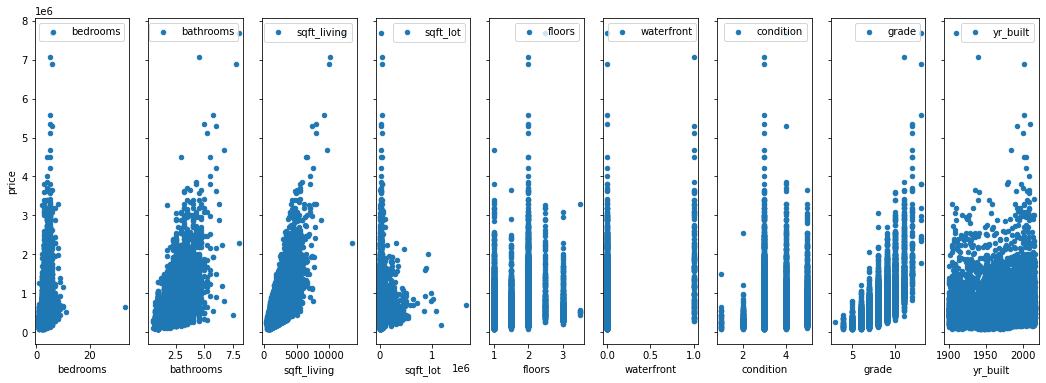

In [12]:
# visualize the relationship between the preditors and the target using scatterplots
import matplotlib.pyplot as plt

channels = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'yr_built']
num_channels = len(channels)
fig, axs = plt.subplots(1, num_channels, sharey=True, figsize=(18, 6))

for idx, channel in enumerate(channels):
    data.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)

plt.legend()
plt.show()



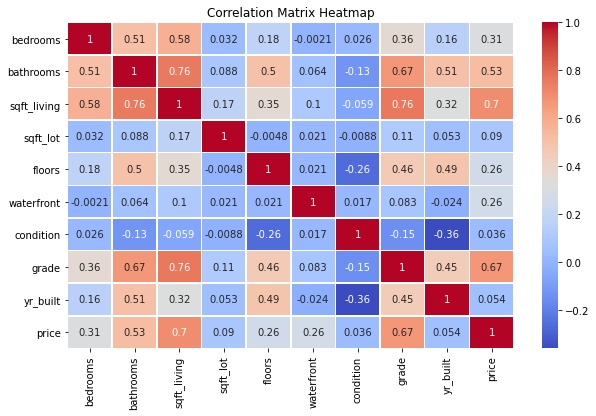

In [13]:
# Calculate the correlation matrix
correlation_matrix = data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'yr_built', 'price']].corr()

# Plot the heat map
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [14]:
# Extract correlations with the target variable
target_correlation = correlation_matrix['price'].drop('price')

# Set a threshold for correlation
threshold = 0.5

# Select features with correlation above the threshold
selected_features = target_correlation[abs(target_correlation) > threshold].index.tolist()
print("Selected Features based on correlation with target:", selected_features)


Selected Features based on correlation with target: ['bathrooms', 'sqft_living', 'grade']


In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Add a constant column for the intercept
X = data[selected_features]
X['Intercept'] = 1

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)


       Feature        VIF
0    bathrooms   2.440608
1  sqft_living   3.248905
2        grade   2.502838
3    Intercept  61.212130


<ipython-input-15-f35c48dcab57>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Intercept'] = 1


A simple regression in Statsmodels with bathrooms as a predictor

## Modelling

In [18]:
import statsmodels.formula.api as smf

#first regression using bathrooms as the predictor
# build the formula 

X = data['bathrooms']
X = sm.add_constant(X)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a fitted model in one line
bathroom_model = smf.ols(formula=f, data=data).fit()
print('This is the first regression model using bathrooms as the predictor', bathroom_model.summary())




This is the first regression model using bathrooms as the predictor                             OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     8256.
Date:                Tue, 16 Jul 2024   Prob (F-statistic):               0.00
Time:                        17:27:23   Log-Likelihood:            -3.0389e+05
No. Observations:               21597   AIC:                         6.078e+05
Df Residuals:                   21595   BIC:                         6.078e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

In [19]:
#second regression using sqft_living as the predictor

X = data['sqft_living']
X = sm.add_constant(X)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = sm.OLS(y, X).fit()
residuals = model.resid
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Tue, 16 Jul 2024   Prob (F-statistic):               0.00
Time:                        17:27:35   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:

# Third regression using grade as the predictor
f ='price ~ grade'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# create a fitted model in one line
model = smf.ols(formula=f, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                 1.740e+04
Date:                Tue, 16 Jul 2024   Prob (F-statistic):               0.00
Time:                        17:27:41   Log-Likelihood:            -3.0101e+05
No. Observations:               21597   AIC:                         6.020e+05
Df Residuals:                   21595   BIC:                         6.020e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.061e+06   1.23e+04    -86.396      0.000   -1.09e+06   -1.04e+06
grade       2.092e+05   1585.790    131.895      0.000    2.06e+05    2.12e+05
==============================================================================
Omnibus:                    19879.964   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2043898.709
Skew:                           4.081   Prob(JB):                         0.00
Kurtosis:                      49.954   Cond. No.                         52.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Modelling - perform iterative modelling by selecting different features. Build 2-3 models and comment on them based on regression metrics such as mean absolute error (mae) and r-squared. (NB: You can first build a simple regression model with the best feature, then add the second with two features, and then the third with three features and compare them)
			§ Define X and y (Separate Feature & Target)
			§ Test-Train Split; 
			§ Scale data if necessary (standardscaler)
			§ model=Linear Regression()
	

## Multiple Regression Model


In [22]:


# Define selected features and target variable
selected_features = ['bathrooms', 'sqft_living']
X = data[selected_features]
y = data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a constant to the model (intercept)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the model
model = sm.OLS(y_train, X_train).fit()

# Summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     8382.
Date:                Tue, 16 Jul 2024   Prob (F-statistic):               0.00
Time:                        17:27:54   Log-Likelihood:            -2.4012e+05
No. Observations:               17277   AIC:                         4.802e+05
Df Residuals:                   17274   BIC:                         4.803e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.385e+04   5886.840     -7.449      

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     6724.
Date:                Tue, 16 Jul 2024   Prob (F-statistic):               0.00
Time:                        17:28:05   Log-Likelihood:            -2.3930e+05
No. Observations:               17277   AIC:                         4.786e+05
Df Residuals:                   17273   BIC:                         4.786e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.202e+05   1.49e+04    -41.485      

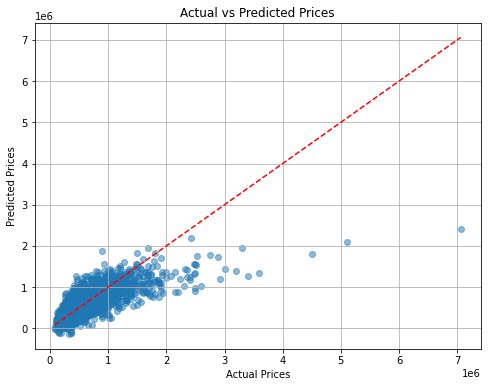

In [24]:
# Define selected features and target variable
selected_features = ['bathrooms', 'sqft_living', 'grade']
X = data[selected_features]
y = data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a constant to the model (intercept)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the model
model = sm.OLS(y_train, X_train).fit()

# Summary of the model
print(model.summary())

#predict the test set
y_pred = model.predict(X_test)


# Evaluate the model
y_pred = model.predict(X_test)
print(f'R-squared: {r2_score(y_test, y_pred)}')
print(f'RMSE: {mean_squared_error(y_test, y_pred, squared=False)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')

# Visualize results with the line of best fit

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line of best fit
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.grid(True)
plt.show()





Robust Regression Methods

In [25]:
# Fit robust linear model (RLM)
model_rlm = sm.RLM(y, X).fit()

# Print summary
print(model_rlm.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                  price   No. Observations:                21597
Model:                            RLM   Df Residuals:                    21594
Method:                          IRLS   Df Model:                            2
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Tue, 16 Jul 2024                                         
Time:                        17:28:24                                         
No. Iterations:                     5                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
bathrooms   -2.972e+04   2451.944    -12.119      

In [ ]:
# Summary of the model


                    Robust linear Model Regression Results                    
Dep. Variable:                  price   No. Observations:                21597
Model:                            RLM   Df Residuals:                    21594
Method:                          IRLS   Df Model:                            2
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Tue, 16 Jul 2024                                         
Time:                        16:42:11                                         
No. Iterations:                     5                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
bathrooms   -2.972e+04   2451.944    -12.119      